<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [17]:
# используем t-test Стьюдента
t , p  = stats.ttest_ind(B, A) 
print("t = " + str(t))
print("p = " + str(p))

t = 1.733800647210997
p = 0.08451003973499756


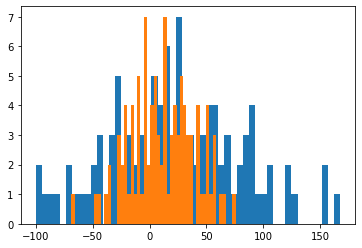

In [19]:
plt.hist(B, bins=50);
plt.hist(A, bins=50);

Наше значение t-критерия меньше 2, это значит, что разница между выборками не доказана и носит случайный характер, статистически не подтверждается (вероятность менее 95%). И p-value больше 5%, что значит мы не можем отклонить нулевую гипотезу H0 со случайным эффектом.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [23]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [2]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

In [24]:
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# интерпретируем значения теста
alpha = 0.05 
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


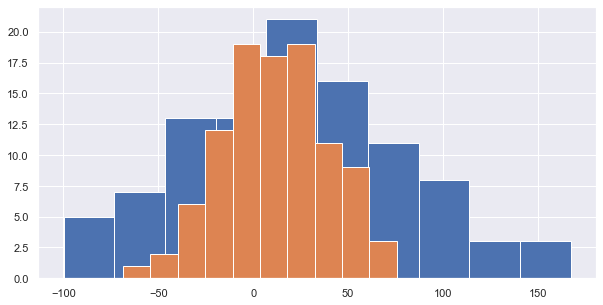

In [27]:
plt.hist(B);
plt.hist(A);

По гистограмме также видно, что выборки имеют разное распределение.

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [28]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]


In [3]:
from scipy.stats import f_oneway # импортируем функцию для дисперсионного анализа из библиотеки scipy пакета stats

In [30]:
F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


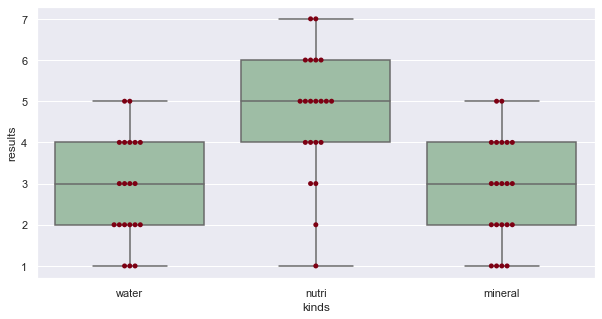

In [34]:
results = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_garden = pd.DataFrame()
df_garden['results'] = results
df_garden['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='results', data=df_garden, color='#99c2a2')
ax = sns.swarmplot(x='kinds', y='results', data=df_garden, color='#7d0013')
plt.show()

По итогам дисперсионного анализа видно, что есть различия в выборках. 

А график "ящик с усами" визуально доказывает, что есть статистически значимый эффект от использования удобрений.

# Cookie Cats (Обязательно)

In [5]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [6]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [7]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


# Выводы:
Из данных мы видим, что большее кол-во игроков было в версии gate_40, но зато в версии gate_30:
* меньшее кол-во игроков сыграло в больше раундов 
* и больше игроков вернулись и играли через 7 дней после установки.


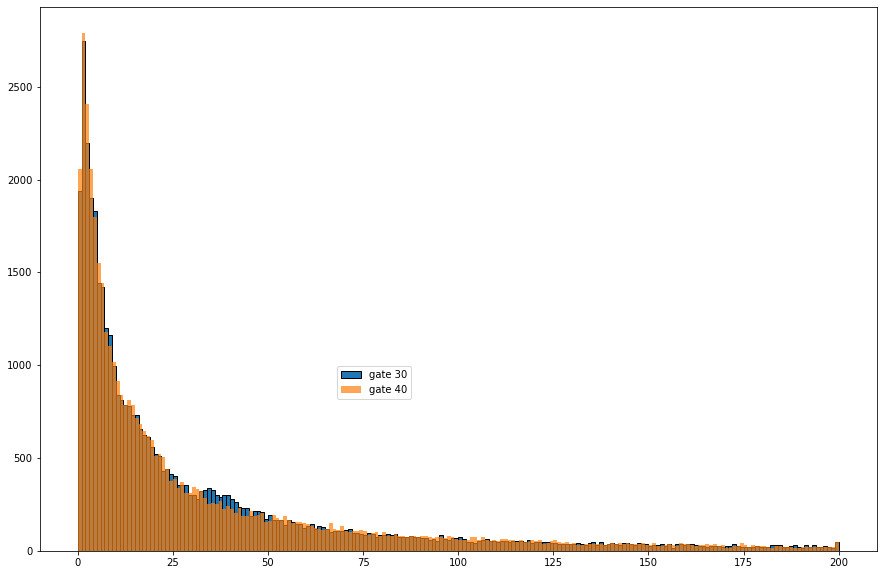

In [8]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Распределение ненормальное, одностороннее.

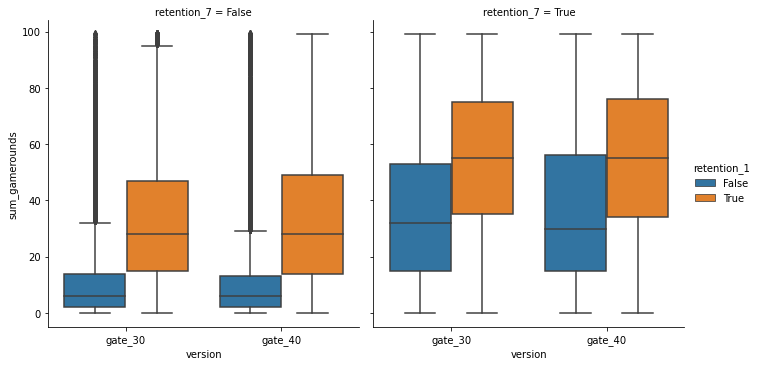

In [9]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

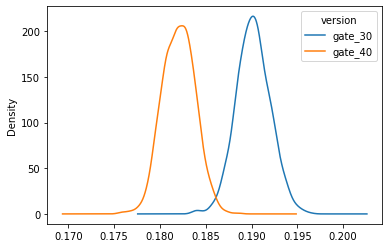

In [10]:
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [11]:
# используем критерий Манна-Уитни, так как распределение ненормальное
from scipy.stats import mannwhitneyu 

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1009027049.500, p=0.025


По критерию Манна-Уитни, значение р меньше 5%, соответственно нулевая гипотеза (H0) может быть отвергнута, различия в выборках есть. 

In [41]:
# дисперсионный анализ
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f, p)

0.7939569526814368 0.3729086824696095


Из ДА видим, что значение F большое, то есть выборки различаются. Если F-статистика превышает критическое значение, то нулевая гипотеза не может быть принята (отвергается) и делается вывод о неравенстве средних.
# Вывод:
Есть статистически значимый эффект из-за сдвига ворот.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).

# Описание задачи

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [12]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [13]:
grass = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') | (pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock')]
grass = grass[['Attack']]
grass.head()

,Attack
0,49
1,62
2,82
3,100
48,50


In [14]:
rock = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') | (pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass')]
rock = rock[['Attack']]
rock.head()

,Attack
80,80
81,95
82,120
103,45
119,85


In [15]:
# используем t-test Стьюдента
t , p  = stats.ttest_ind(grass, rock) 
print("t = " + str(t))
print("p = " + str(p))

t = [-3.72945758]
p = [0.00027333]


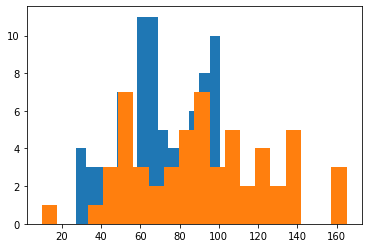

In [16]:
plt.hist(grass, bins=20);
plt.hist(rock, bins=20);

Профессор не прав: покемоны в классе grass имеют менее сильную обычную атаку, чем у покемонов в классе rock, это видно из гистограммы.

Так как значение p меньше 5%, то мы отвергаем нулевую гипотезу о том, что различие не значительно.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [17]:
Water = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') | (pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal')]
Water = Water[['Speed']]
Water.head()

,Speed
9,43
10,58
11,78
12,78
59,55


In [18]:
Normal = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') | (pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water')]
Normal = Normal[['Speed']]
Normal.head()

,Speed
20,56
21,71
22,101
23,121
24,72


In [19]:
# используем t-test Стьюдента
t , p  = stats.ttest_ind(Water, Normal) 
print("t = " + str(t))
print("p = " + str(p))

t = [-2.15091333]
p = [0.03255354]


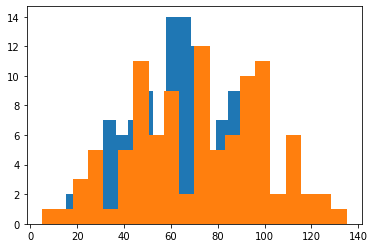

In [20]:
plt.hist(Water, bins=20);
plt.hist(Normal, bins=20);

Профессор не прав: покемоны в классе Water в среднем менее быстрые, чем покемоны в классе Normal, это видно из гистограммы.

Так как значение p меньше 5%, то мы отвергаем нулевую гипотезу о том, что различие не значительно.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [21]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [42]:
df_treated = pokemon[pokemon.Name.isin(treathed_pokemon)]
df_treated = df_treated[['Speed']]
df_treated.head()

,Speed
19,145
71,150
428,150
476,135


In [44]:
pokemon_other = pokemon[pokemon.Name.isin(treathed_pokemon) == False]
pokemon_other = pokemon_other[['Speed']]
pokemon_other.head()

,Speed
0,45
1,60
2,80
3,80
4,65


In [49]:
# используем t-test Стьюдента
t , p  = stats.ttest_ind(pokemon_other, df_treated) 
print("t = " + str(t))
print("p = " + str(p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t = [-5.3854074]
p = [9.51510118e-08]
Разные распределения (отвергаем H0)


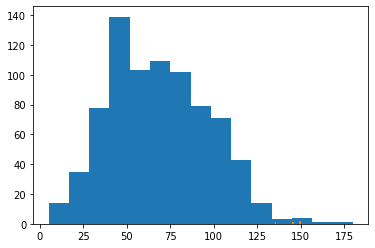

In [51]:
plt.hist(pokemon_other, bins=15);
plt.hist(df_treated, bins=15);

In [54]:
print(pokemon_other.mean())
print(df_treated.mean())

Speed    67.89196
dtype: float64
Speed    145.0
dtype: float64


### Вывод:
Сыворотка работает, это доказывает тест Стьюдента, гистограмма и даже по среднему из выборок видно, что различие статистически значимо.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [58]:
legendary = pokemon[(pokemon['Legendary'] == True)]

for row in legendary:
    legendary['summa'] = legendary['HP'] + legendary['Attack'] + legendary['Defense']
    
legendary.head()

<ipython-input-58-f603143fd188>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legendary['summa'] = legendary['HP'] + legendary['Attack'] + legendary['Defense']


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396


In [59]:
legendary_sum = legendary['summa']
legendary_sum.head()

156    275
157    265
158    280
162    306
163    396
Name: summa, dtype: int64

In [60]:
not_legendary = pokemon[(pokemon['Legendary'] == False)]

for row in not_legendary:
    not_legendary['summa'] = not_legendary['HP'] + not_legendary['Attack'] + not_legendary['Defense']
    
not_legendary_sum = not_legendary['summa']
not_legendary_sum.head()

<ipython-input-60-7f2391716190>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_legendary['summa'] = not_legendary['HP'] + not_legendary['Attack'] + not_legendary['Defense']


0    143
1    185
2    245
3    303
4    134
Name: summa, dtype: int64

In [61]:
t , p  = stats.ttest_ind(legendary_sum, not_legendary_sum) 
print("t = " + str(t))
print("p = " + str(p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t = 11.591852366462316
p = 7.970942205722087e-29
Разные распределения (отвергаем H0)


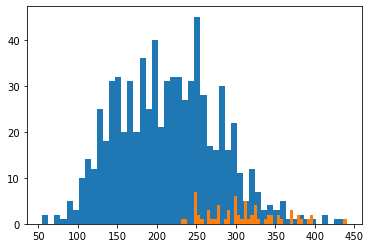

In [63]:
plt.hist(not_legendary_sum, bins=50);
plt.hist(legendary_sum, bins=50);

### Вывод:
Статистически видно, что сумма характеристик HP,Attack,Defense у легендарных покемонов действительно выше, чем у других покемонов.

In [64]:
for row in legendary:
    legendary['multipl'] = legendary['HP'] * legendary['Attack'] * legendary['Defense']
    
legendary_multipl = legendary['multipl']
legendary_multipl.head()

<ipython-input-64-9464d2d421a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legendary['multipl'] = legendary['HP'] * legendary['Attack'] * legendary['Defense']


156     765000
157     688500
158     810000
162    1049400
163    2014000
Name: multipl, dtype: int64

In [65]:
for row in not_legendary:
    not_legendary['multipl'] = not_legendary['HP'] * not_legendary['Attack'] * not_legendary['Defense']
    
not_legendary_multipl = not_legendary['multipl']
not_legendary_multipl.head()

<ipython-input-65-3d59b69c0098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_legendary['multipl'] = not_legendary['HP'] * not_legendary['Attack'] * not_legendary['Defense']


0    108045
1    234360
2    544480
3    984000
4     87204
Name: multipl, dtype: int64

In [66]:
t , p  = stats.ttest_ind(legendary_multipl, not_legendary_multipl) 
print("t = " + str(t))
print("p = " + str(p))

alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

t = 13.263253408231844
p = 1.992664308842282e-36
Разные распределения (отвергаем H0)


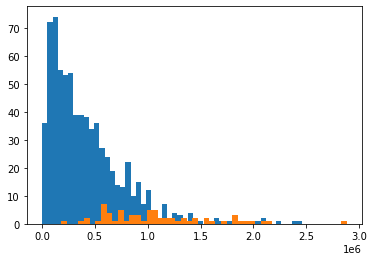

In [67]:
plt.hist(not_legendary_multipl, bins=50);
plt.hist(legendary_multipl, bins=50);

In [68]:
stat, p = mannwhitneyu(not_legendary_multipl, legendary_multipl)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5741.500, p=0.000


### Вывод:
Различие в произведениях характеристик HP,Attack,Defense у легендарных покемонов есть, но как видно из распределения оно незначительно.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [46]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [23]:
rock_def = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
rock_def = rock_def[['Defense']]
rock_def.head()

,Defense
80,100
81,115
82,130
103,160
119,95


In [24]:
ground_def = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
ground_def = ground_def[['Defense']]
ground_def.head()

,Defense
32,85
33,110
36,87
39,77
55,25


In [25]:
steel_def = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
steel_def = steel_def[['Defense']]
steel_def.head()

,Defense
88,70
89,95
220,140
223,200
224,230


In [26]:
ice_def = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]
ice_def = ice_def[['Defense']]
ice_def.head()

,Defense
94,80
98,180
133,35
142,80
156,100


In [27]:
F, p = f_oneway(rock_def, ground_def, steel_def, ice_def)  # дисперсионный анализ

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

[10.82012408] [1.23152817e-06]
Разное распределение (отклоняем H0)


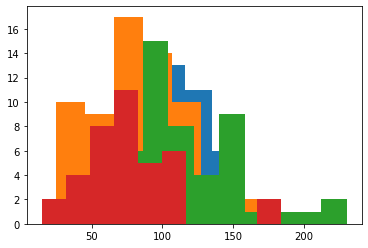

In [31]:
plt.hist(rock_def);
plt.hist(ground_def);
plt.hist(steel_def);
plt.hist(ice_def);

Из дисперсионного анализа и гистограммы видим, что различия в классах все-таки есть.